<a href="https://colab.research.google.com/github/Raidin/DeepLearningReserach/blob/remind_basic_skill/activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activation Function Summary**
---
> Activation Function(활성화 함수)는 Neural Network의 입력신호를 출력 신호롸 변환하는 함수이다. 활성화 함수는 대개 비선형함수(non-linear function)을 사용하며, 자주 사용되는 함수는 아래와 같다.
* Sigmoid
* Hyperbolic Tangent
* Relu
* Leaky Relu
* PRelu
* ELU


>  [Wikipedia URL](https://en.wikipedia.org/wiki/Activation_function)



In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def EachFunctinDraw(*args) :
    plt.figure(figsize=(8, 8))

    plt.plot(x, args[1], label=args[0], linewidth='1.0', linestyle="-")

    # plt.grid(True)
    plt.grid(alpha=.9,linestyle='--')
    plt.title(args[0])
    plt.legend(loc='upper left')

    '''
    Equation Display
    '''
    plt.text(0.2, 0.2, args[2], fontsize=15)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


In [0]:
def MergeFunctionDraw(titme, x, **kwarg):
    plt.figure(figsize=(10, 10))

    for key, value in kwarg.items():
        plt.plot(x, value, label=key, linewidth='1.0', linestyle="-")

    # plt.grid(True)
    plt.grid(alpha=.4,linestyle='--')
    plt.title(titme)
    plt.legend(loc='upper left', fontsize='x-large')

    '''
    axis 가운데로 정렬
    '''
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


In [0]:
def Activate(title, activation_func):
    x = np.linspace(-4, 4, 100, endpoint=True)

    function = activation_func(x)
    derivative = activation_func(x, True)

    result = dict()
    result['Function'] = function
    result['Derivative'] = derivative

    MergeFunctionDraw(title, x, **result)


### 1. Sigmoid
---
![Sigmoid](https://docs.google.com/uc?export=download&id=1ZqXrrloRpneU76dScjb3hsj0gXODkbdm)


> Sigmoid 함수는 로지스틱 함수로도 불리며 출력 값의 범위는 [0 : 1]이고, 입력값이 크면 1, 작으면 0에 수렴 되는 특징을 가진다. 초기 신경망에서 많이 사용 했지만, 현재는 많이 사용 하지 않는다.
* 장점
  * [0:1]사이의 값으로만 출력 되므로 Exploding Gradient 현상이 발생하지 않음
  * 미분식이 단순한 형태 이다.
* 단점
  * Sigmoid함수를 미분했을 때, 최대 값은 0.25이다. 즉, 층(layer)가 깊을수록 기울기가 0으로 수렴되어 gradient값이 작아지게 되어 학습이 잘 되지 않는 문제가 생긴다.
  * 지수함수(exponential)연산을 하여 학습이 느려지는 단점이 있다.

In [0]:
def Sigmoid(x, prime=False):
    if prime:
        return Sigmoid(x) * (1-Sigmoid(x))
    else:
        # Sigmoid = lambda x: 1 / (1 + np.exp(-x))
        return 1 / (1 + np.exp(-x))


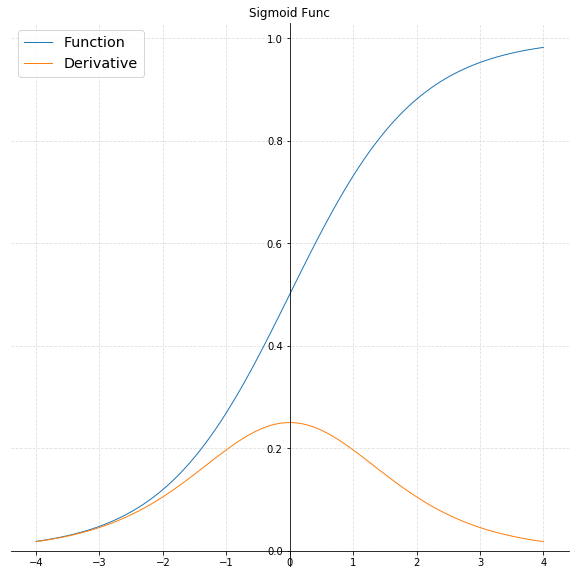

In [25]:
Activate('Sigmoid Func', Sigmoid)

# 수식을 Latex로 표기
# eq = r'$\sigma(x)=\frac{1}{1+e^{-x}}$'
# EachFunctinDraw('sigmoid', function, eq);

### 2. Hyperbolic Tangent
---
![Tanh](https://docs.google.com/uc?export=download&id=17-XgItt8fBP-WOf1y_RQ4otG4fvjLP-J)
> Tanh 함수는 Sigmoid 함수를 변형(크기와 위치를 조절)한 함수로 [-1:1] 범위의 출력 값을 가진다.
* 장점
  * 함수의 출력 값이 0에 대해서 대칭(zero-centered)으로 학습시 수렴속도가 sigmoid보다 빠르다.
* 단점
  * tanh 함수의 미분 최대값은 1이지만, 네트워크 층이 깊어 질수록 마찬가지로 입력 값이 크거나 작은경우 기울기가 0으로 수렴하여 gradient 값이 작아지게 되어 학습이 잘 되지 않는 문제가 발생한다.

In [0]:
def HyperbolicTangent(x, prime=False):
    if prime:
        return 1 - pow(HyperbolicTangent(x),2)
    else:
        # return 2 / (1 + np.exp(-2 * x)) - 1
        return 2 * Sigmoid(2 * x) -1


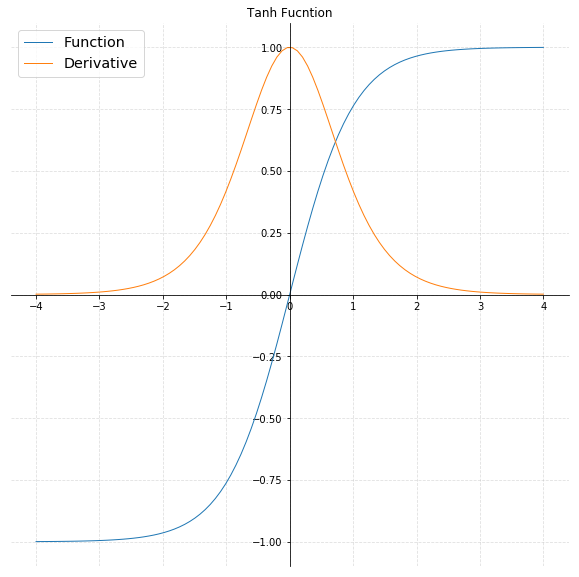

In [27]:
Activate('Tanh Fucntion', HyperbolicTangent)

# 수식을 Latex로 표기
# eq = r'$\tanh (x)=\frac{2}{1+e^{-2 x}}-1$'
# EachFunctinGraph('tanh', function, eq);

### 3. Relu
---
![Relu](https://docs.google.com/uc?export=download&id=1VvkeH0u2rCANsJPycX0MvUCoEgeB5vJj)
> Relu(Rectified Linear Unit)은 가장 인기 있는 활성화 함수 이다.[0:1]사이의 범위를 가지며 x > 0 이면 기울기가 1인 직선, x < 0이면 출력값은 0이다.
* 장점
  * 지수함수 연산을 하지 않으므로 속도가 빠르다.
* 단점
  * 입력 값이 0보다 작을경우 출력 값이 0이 되어 네트워크 학습시 뉴런이 죽는(dying ReLU)문제이다. (하지만, 대부분의 CNN에 사용되는 영상의 경우 0 ~ 1사의 값으로 scale되어 사용)

In [0]:
def Relu(x, prime=False):
    if prime:
        # return np.where(x>0,1,0)
        return np.maximum(abs(x)/(x+1e-8), 0)
    else:
        return np.maximum(x, 0)

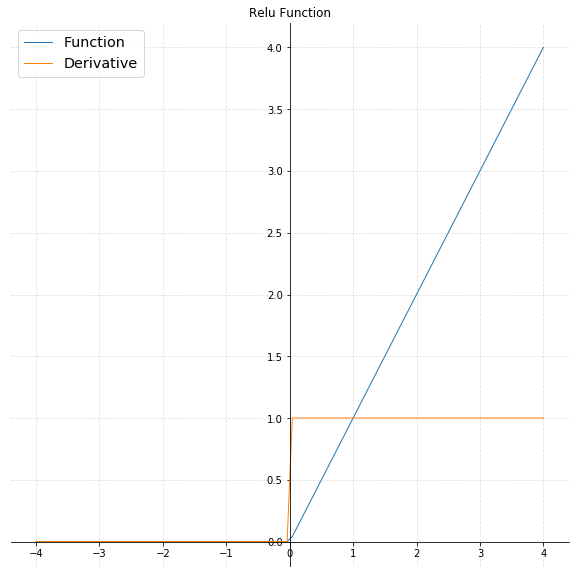

In [29]:
Activate('Relu Function', Relu)

# eq = r'$f(x)=\max (0, x)$'
# EachFunctinGraph('relu', function, eq);

### 4. Leaky Relu
---
![LeakyRelu](https://docs.google.com/uc?export=download&id=1haRJqeeqHBD2LcPQuWW1GvX4p4JFzx7V)
> LeakyRelu는 Relu 함수 사용시 dying Relu 현상을 해결 하기한 함수이다.
* Relu는 입력 값이 0보다 작은경우 기울기가 0이 되지만, Leaky Relu는 작은 기울기를 부여함으로써 dying Relu문제를 방지한다.
* Relu보다 항상 더 좋은 성능을 내지는 않는다(dying Relu를 대응하기 위한 하나의 방법)



In [0]:
def LeakyRelu(x, prime=False):
    if prime:
        return np.maximum(abs(x)/(x+1e-8), 0.01)
    else:
        return np.maximum(x * 0.01, x)

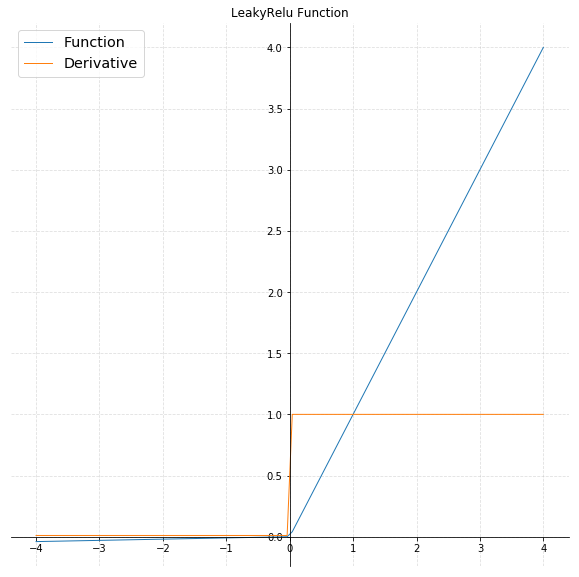

In [31]:
Activate('LeakyRelu Function', LeakyRelu)

# eq = r'$f(x)=\max (0.01 x, x)$'
# EachFunctinGraph('LeakyRelu', function, eq);

### 4. PRelu
---
![PRelu](https://docs.google.com/uc?export=download&id=1mKld45X_bDoxAa1ryPturNYaRPPSzQz3)
> Leaky Relu와 비슷한 특징을 가지는 함수로 파라미터 alpha를 추가하여 입력 값이 0보다 작을 경우 학습 가능 하도록 만든 함수 이다
* 문제에 따라서 유동적으로 alpha값을 설정 가능하다.(반대로, 문제에 따라 상수 값을 설정해야되는 단점이 있다)


In [0]:
def PRelu(x, prime=False):
    alpha = 0.5
    if prime:
        return np.where(x < 0, alpha, abs(x)/(x+1e-8))
    else:
        return np.maximum(x * alpha, x)

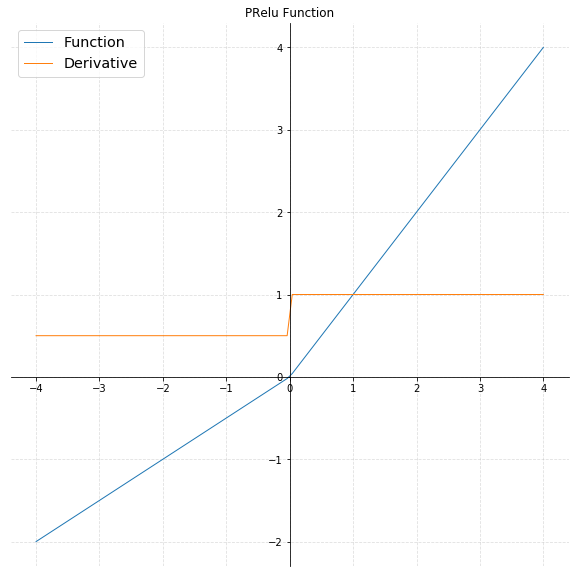

In [33]:
Activate('PRelu Function', PRelu)

# eq = r'$f(x)=\max (\alpha x, x)$'
# EachFunctinGraph('PRelu', activation, eq);

### 5. ELU
---
![ELU](https://docs.google.com/uc?export=download&id=1PbmRMbvC46yYpkXCroNCLJ4hFDMOiXs6)
> ELU는 Relu의 threshold를 -1로 낮춘 함수를 exp^x를 이용하여 근사한 함수이다.
* Relu의 장점을 모두 포함
* dying Relu 문제 해결
* 출력값이 거의 zero-centered
* 단점으로 기존의 Relu계열의 함수와 달리 지수함수(exp) 연산이 필요하여 연산시간 많이 소요

In [0]:
def ELU(x, prime=False):
    alpha = 1
    if prime:
        return np.where(x > 0,  x/(x+1e-8), alpha * np.exp(x))
    else:
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))
        # return np.maximum(0, x) + np.minimum(0, alpha * (np.exp(x) - 1))

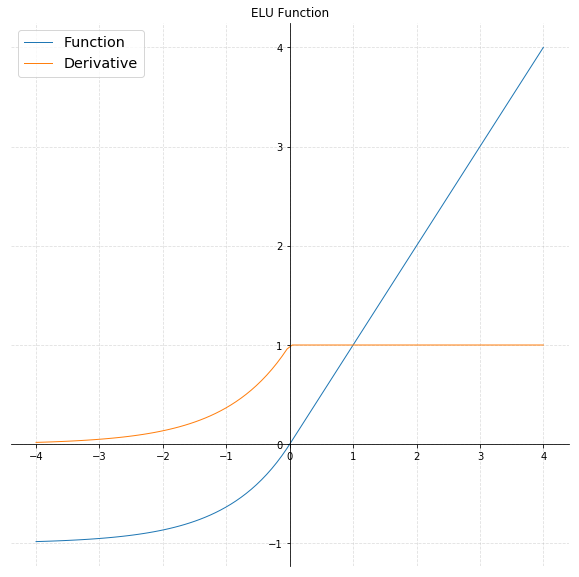

In [35]:
Activate('ELU Function', ELU)

# eq = r'$f(x)=\max (0, x)+\min \left(0, \alpha *\left(e^{\frac{x}{\alpha}}-1\right)\right)$'
# EachFunctinGraph('ELU', activation, eq);

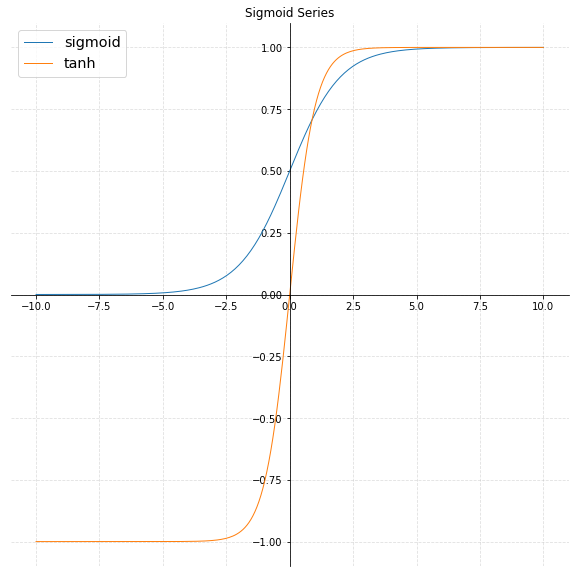

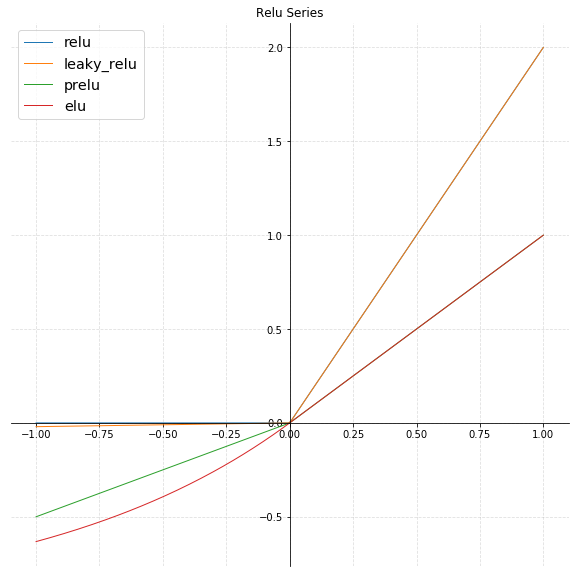

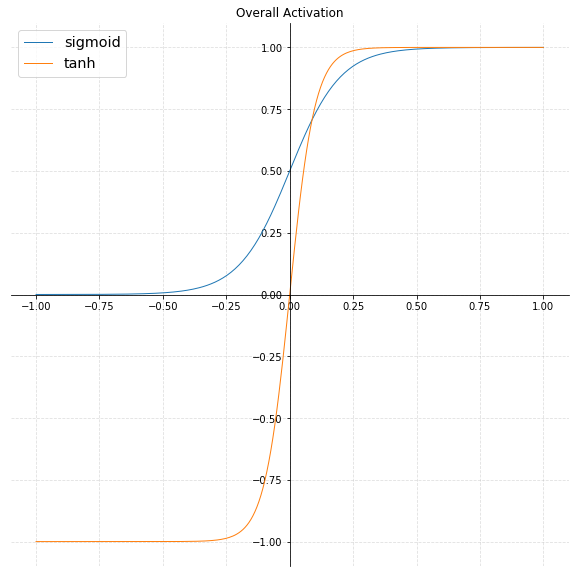

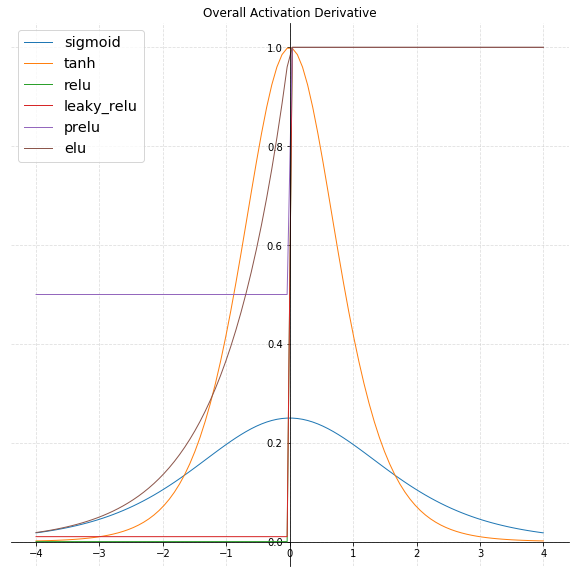

In [47]:
sigmoid_series = dict()
x = np.linspace(-10, 10, 256, endpoint=True)
sigmoid_series['sigmoid'] = Sigmoid(x)
sigmoid_series['tanh'] = HyperbolicTangent(x)

'''
Sigmoid Series Activation Function Visualization
'''
MergeFunctionDraw('Sigmoid Series', x, **sigmoid_series)

relu_series = dict()
x = np.linspace(-2, 2, 256, endpoint=True)
relu_series['relu'] = Relu(x)
relu_series['leaky_relu'] = LeakyRelu(x)

x = np.linspace(-1, 1, 256, endpoint=True)
relu_series['prelu'] = PRelu(x)
relu_series['elu'] = ELU(x)

'''
Relu Series Activation Function Visualization
'''
MergeFunctionDraw('Relu Series', x, **relu_series)

overall = dict()
overall.update(sigmoid_series)
overall.update(relu_series)

'''
Overall Activation Function Visualization
'''
MergeFunctionDraw('Overall Activation', x, **sigmoid_series)

overall_derivative = dict()
x = np.linspace(-4, 4, 100, endpoint=True)
overall_derivative['sigmoid'] = Sigmoid(x, True)
overall_derivative['tanh'] = HyperbolicTangent(x, True)
overall_derivative['relu'] = Relu(x, True)
overall_derivative['leaky_relu'] = LeakyRelu(x, True)
overall_derivative['prelu'] = PRelu(x, True)
overall_derivative['elu'] = ELU(x, True)

'''
Overall Activation Function Derivative Visualization
'''
MergeFunctionDraw('Overall Activation Derivative', x, **overall_derivative)
    